In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from PIL import Image

In [3]:
image1 = Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0117-0001.jpeg")
image2 = Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0127-0001.jpeg")
image3 = Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0158-0001.jpeg")

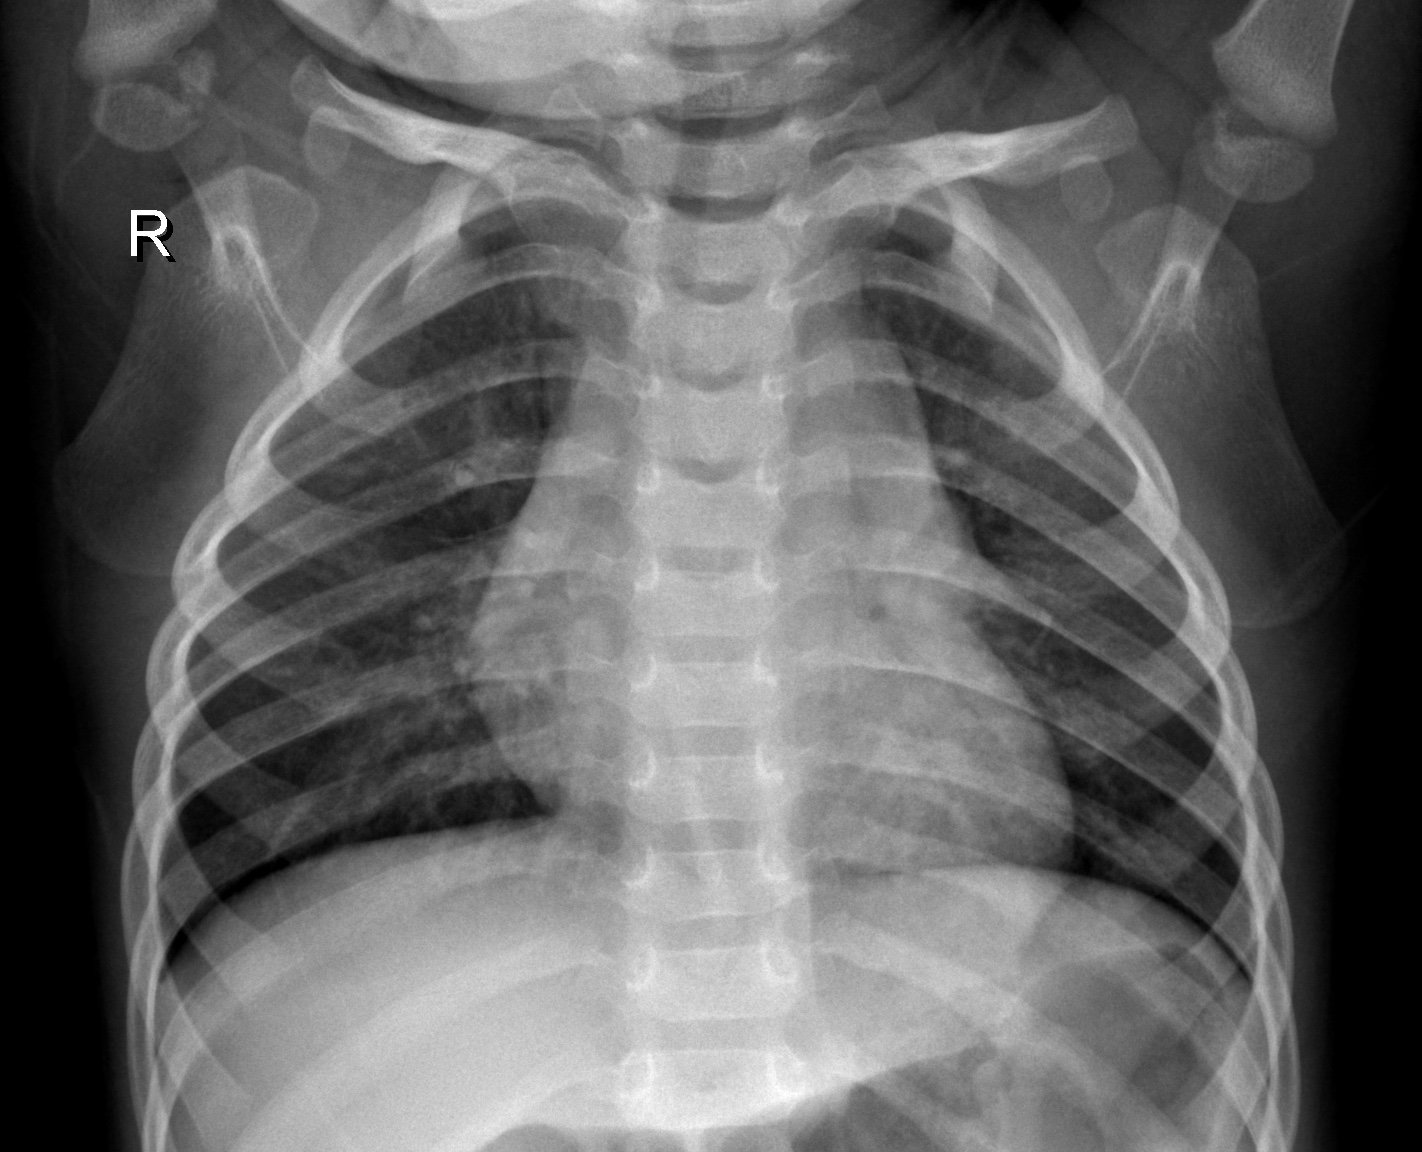

In [4]:
image1

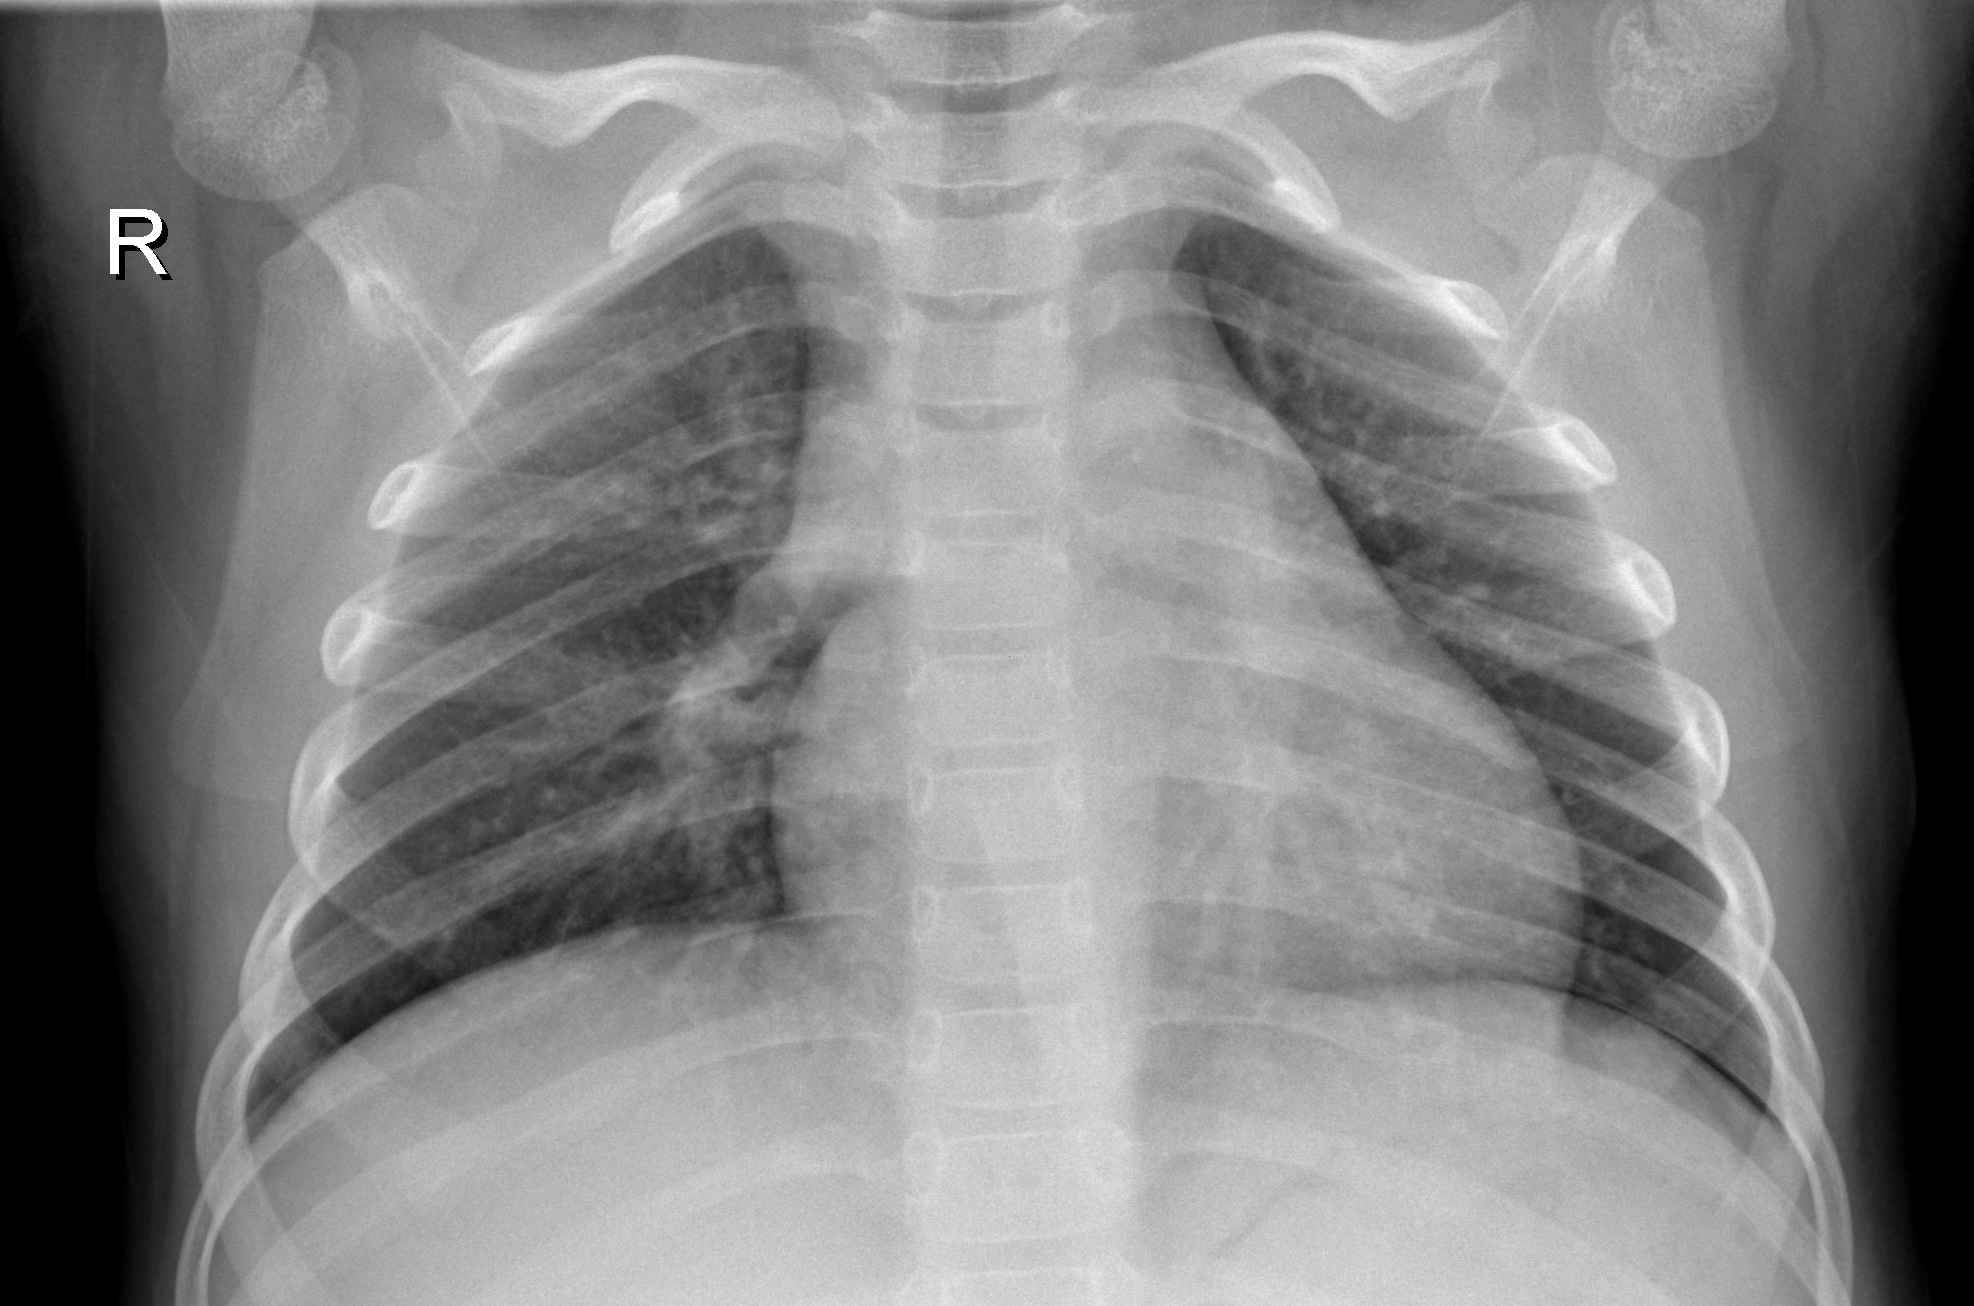

In [5]:
image2

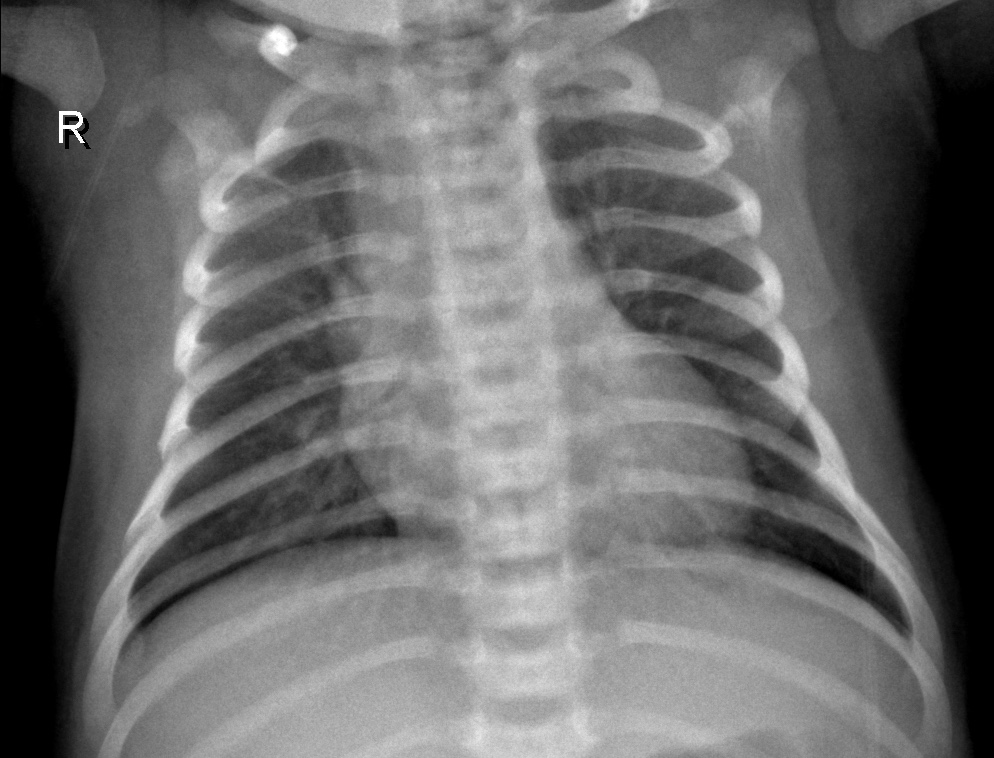

In [6]:
image3

In [7]:
image1.size, image2.size, image3.size  # Lets see the image sizes 

((1422, 1152), (1974, 1306), (994, 758))

In [8]:
mainDIR = os.listdir('/kaggle/input/chest-xray-pneumonia/')
print(mainDIR)

['chest_xray']


In [9]:
train_folder= '/kaggle/input/chest-xray-pneumonia/'
val_folder = '/kaggle/input/chest-xray-pneumonia/'
test_folder = '/kaggle/input/chest-xray-pneumonia/'

In [10]:
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [11]:
train_n

'/kaggle/input/chest-xray-pneumonia/NORMAL/'

In [12]:
from pathlib import Path

In [13]:
train_dir = Path("/kaggle/input/chest-xray-pneumonia/chest_xray/train")
test_dir = Path("/kaggle/input/chest-xray-pneumonia/chest_xray/test")
valid_dir = Path("/kaggle/input/chest-xray-pneumonia/chest_xray/test")

train_files = list(train_dir.glob("*/*"))
test_files = list(test_dir.glob("*/*"))
valid_files = list(valid_dir.glob("*/*"))

print(f"Images train set: {len(train_files)}")
print(f"Images test set: {len(test_files)}")
print(f"Images valid set: {len(valid_files)}")

Images train set: 5216
Images test set: 624
Images valid set: 624


In [14]:
import tensorflow as tf

In [16]:
train_dataset =tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

train_dataset

Found 5216 files belonging to 2 classes.


<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

In [17]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

test_dataset

Found 624 files belonging to 2 classes.


<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

In [18]:
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

## A simple CNN

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation ="relu", input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dropout(0.2))
#model.add(Dense(64, activation ="relu"))
#model.add(Dense(128, activation ="relu"))
#model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(1, activation ="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                9

In [20]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [21]:
history = model.fit(train_dataset, steps_per_epoch= len(train_dataset), epochs = 10, verbose= 1, validation_data = test_dataset, validation_steps = len(test_dataset))

Epoch 1/10
163/163 [==============================] - 46s 221ms/step - loss: 1.8218 - accuracy: 0.8564 - val_loss: 0.9947 - val_accuracy: 0.7324
Epoch 2/10
163/163 [==============================] - 26s 150ms/step - loss: 0.1796 - accuracy: 0.9360 - val_loss: 1.3905 - val_accuracy: 0.7276
Epoch 3/10
163/163 [==============================] - 25s 149ms/step - loss: 0.1343 - accuracy: 0.9523 - val_loss: 0.9424 - val_accuracy: 0.7628
Epoch 4/10
163/163 [==============================] - 26s 151ms/step - loss: 0.1201 - accuracy: 0.9561 - val_loss: 2.0891 - val_accuracy: 0.6987
Epoch 5/10
163/163 [==============================] - 26s 151ms/step - loss: 0.1080 - accuracy: 0.9622 - val_loss: 1.3448 - val_accuracy: 0.7708
Epoch 6/10
163/163 [==============================] - 26s 147ms/step - loss: 0.0930 - accuracy: 0.9688 - val_loss: 2.4129 - val_accuracy: 0.7340
Epoch 7/10
163/163 [==============================] - 26s 151ms/step - loss: 0.0712 - accuracy: 0.9745 - val_loss: 2.1907 - val_ac

## ImageNet 

In [22]:
base_model = tf.keras.applications.Xception(input_shape=(128,128,3),include_top=False,weights="imagenet")

83697664/83683744 [==============================] - 0s 0us/step


In [23]:
# Freezing Layers

for layer in base_model.layers[:-5]:
    layer.trainable=False

In [24]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 4, 4, 2048)        20861480  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

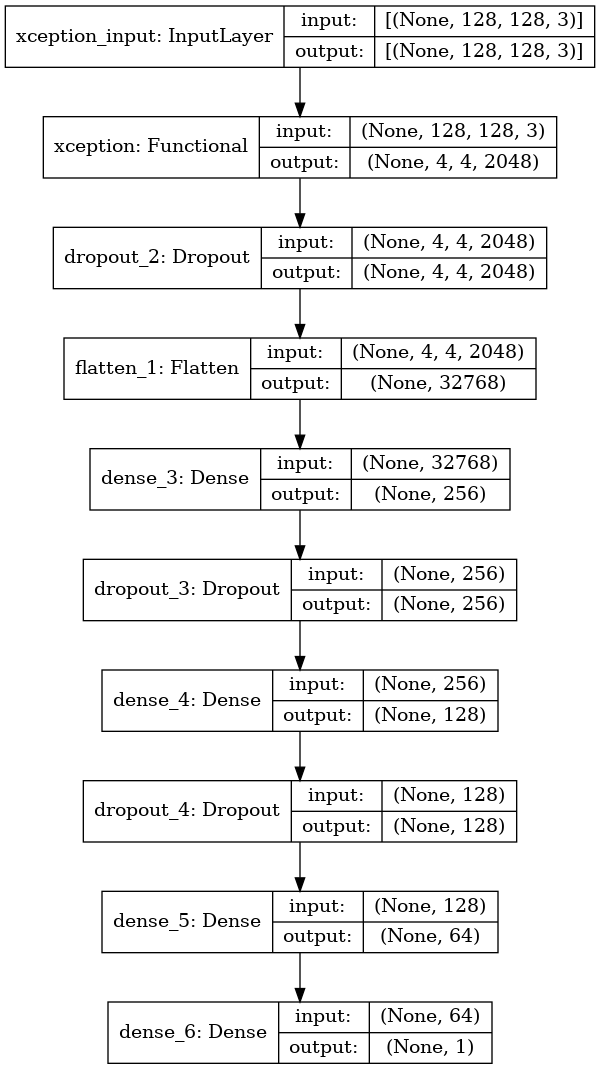

In [25]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [26]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [29]:
history = model.fit(train_dataset, steps_per_epoch= len(train_dataset), epochs = 15, verbose= 1, validation_data = test_dataset, validation_steps = len(test_dataset))

Epoch 1/15
163/163 [==============================] - 27s 160ms/step - loss: 0.1201 - accuracy: 0.9559 - val_loss: 2.3461 - val_accuracy: 0.6538
Epoch 2/15
163/163 [==============================] - 27s 160ms/step - loss: 0.1113 - accuracy: 0.9559 - val_loss: 1.1081 - val_accuracy: 0.7660
Epoch 3/15
163/163 [==============================] - 27s 158ms/step - loss: 0.1012 - accuracy: 0.9645 - val_loss: 1.3103 - val_accuracy: 0.7837
Epoch 4/15
163/163 [==============================] - 28s 160ms/step - loss: 0.0934 - accuracy: 0.9674 - val_loss: 1.4042 - val_accuracy: 0.7067
Epoch 5/15
163/163 [==============================] - 27s 159ms/step - loss: 0.0880 - accuracy: 0.9684 - val_loss: 1.1269 - val_accuracy: 0.7740
Epoch 6/15
163/163 [==============================] - 27s 156ms/step - loss: 0.0794 - accuracy: 0.9693 - val_loss: 1.4191 - val_accuracy: 0.7372
Epoch 7/15
163/163 [==============================] - 27s 160ms/step - loss: 0.0789 - accuracy: 0.9732 - val_loss: 1.7622 - val_ac

## MobileNet V-1

In [30]:
import tensorflow_hub as hub

In [31]:
model_hub = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128,128,3)),
    hub.KerasLayer('/kaggle/input/mobilenet-v1/tensorflow2/075-128-classification/2',
                  trainable=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_hub.build([None, 128, 128, 3])  # Batch input shape.
model_hub.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              2602745   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1001)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1002      
Total params: 2,603,747
Trainable params: 2,587,331
Non-trainable params: 16,416
_________________________________________________________________


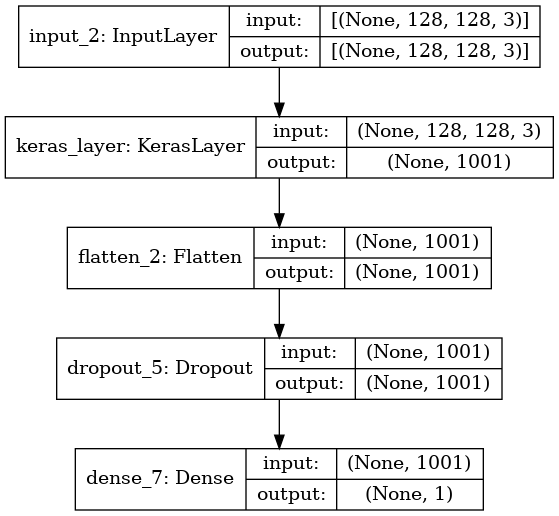

In [32]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model_hub, to_file='convnet2.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet2.png')

In [33]:
model_hub.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [34]:
history = model_hub.fit(train_dataset, steps_per_epoch= len(train_dataset), epochs = 15, verbose= 1, validation_data = test_dataset, validation_steps = len(test_dataset))

Epoch 1/15
163/163 [==============================] - 32s 168ms/step - loss: 0.3860 - accuracy: 0.9548 - val_loss: 4.1500 - val_accuracy: 0.7019
Epoch 2/15
163/163 [==============================] - 29s 169ms/step - loss: 0.2547 - accuracy: 0.9780 - val_loss: 2.3221 - val_accuracy: 0.8157
Epoch 3/15
163/163 [==============================] - 28s 166ms/step - loss: 0.2240 - accuracy: 0.9885 - val_loss: 1.5562 - val_accuracy: 0.8429
Epoch 4/15
163/163 [==============================] - 28s 166ms/step - loss: 0.2210 - accuracy: 0.9893 - val_loss: 0.6368 - val_accuracy: 0.8958
Epoch 5/15
163/163 [==============================] - 28s 166ms/step - loss: 0.2112 - accuracy: 0.9904 - val_loss: 0.9081 - val_accuracy: 0.8942
Epoch 6/15
163/163 [==============================] - 28s 167ms/step - loss: 0.2160 - accuracy: 0.9889 - val_loss: 2.5302 - val_accuracy: 0.7067
Epoch 7/15
163/163 [==============================] - 28s 166ms/step - loss: 0.1991 - accuracy: 0.9919 - val_loss: 3.2880 - val_ac

## MobileNet V-2

In [35]:
model_hub2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128,128,3)),
    hub.KerasLayer("https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/100-128-classification/versions/2",
               trainable=True, arguments=dict(batch_norm_momentum=0.997)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_hub2.build([None, 128, 128, 3])  # Batch input shape.
model_hub2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              3540265   
_________________________________________________________________
flatten_3 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1001)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 1002      
Total params: 3,541,267
Trainable params: 3,507,155
Non-trainable params: 34,112
_________________________________________________________________


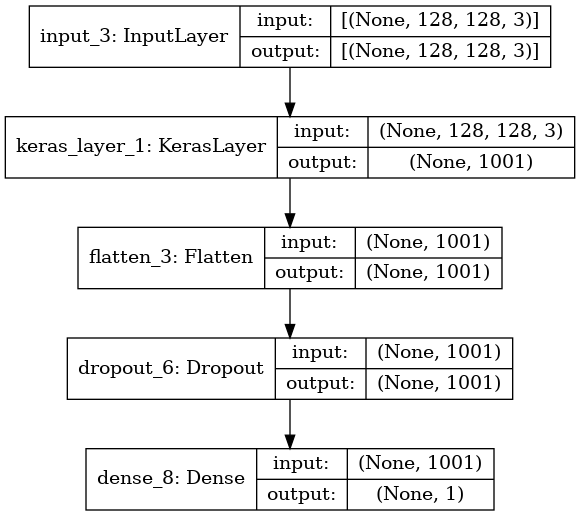

In [36]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model_hub2, to_file='convnet2.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet2.png')

In [37]:
model_hub2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [38]:
history = model_hub2.fit(train_dataset, steps_per_epoch= len(train_dataset), epochs = 15, verbose= 1, validation_data = test_dataset, validation_steps = len(test_dataset))

Epoch 1/15
163/163 [==============================] - 36s 179ms/step - loss: 0.2759 - accuracy: 0.9496 - val_loss: 4.3487 - val_accuracy: 0.5705
Epoch 2/15
163/163 [==============================] - 30s 175ms/step - loss: 0.1923 - accuracy: 0.9730 - val_loss: 2.2463 - val_accuracy: 0.8830
Epoch 3/15
163/163 [==============================] - 30s 173ms/step - loss: 0.1606 - accuracy: 0.9839 - val_loss: 1.3730 - val_accuracy: 0.9359
Epoch 4/15
163/163 [==============================] - 30s 174ms/step - loss: 0.1514 - accuracy: 0.9849 - val_loss: 2.9428 - val_accuracy: 0.8958
Epoch 5/15
163/163 [==============================] - 30s 171ms/step - loss: 0.1458 - accuracy: 0.9881 - val_loss: 1.1277 - val_accuracy: 0.8958
Epoch 6/15
163/163 [==============================] - 30s 174ms/step - loss: 0.1370 - accuracy: 0.9889 - val_loss: 1.7052 - val_accuracy: 0.8622
Epoch 7/15
163/163 [==============================] - 30s 174ms/step - loss: 0.1244 - accuracy: 0.9925 - val_loss: 3.1881 - val_ac

## İnception - V3

In [39]:
model_hub3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128,128,3)),
    hub.KerasLayer("https://kaggle.com/models/google/inception-v3/frameworks/TensorFlow2/variations/classification/versions/2",
               trainable=True, arguments=dict(batch_norm_momentum=0.997)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_hub3.build([None, 128, 128, 3])  # Batch input shape.
model_hub3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              23853833  
_________________________________________________________________
flatten_4 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1001)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1002      
Total params: 23,854,835
Trainable params: 23,820,403
Non-trainable params: 34,432
_________________________________________________________________


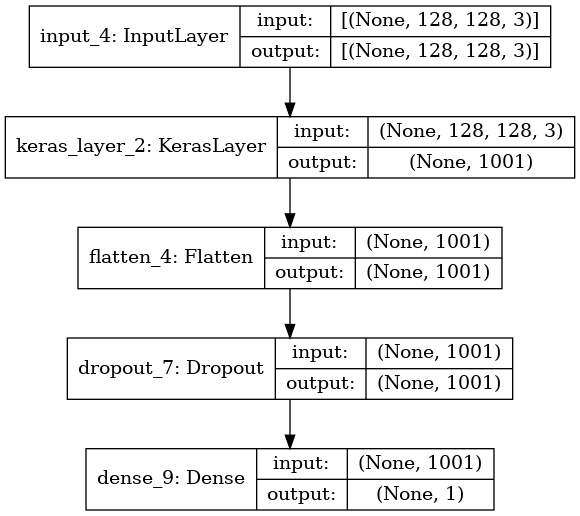

In [40]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model_hub3, to_file='convnet3.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet3.png')

In [41]:
model_hub3.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [42]:
history = model_hub3.fit(train_dataset, steps_per_epoch= len(train_dataset), epochs = 15, verbose= 1, validation_data = test_dataset, validation_steps = len(test_dataset))

Epoch 1/15
163/163 [==============================] - 43s 192ms/step - loss: 0.5706 - accuracy: 0.9358 - val_loss: 41.8756 - val_accuracy: 0.3750
Epoch 2/15
163/163 [==============================] - 31s 183ms/step - loss: 0.3867 - accuracy: 0.9703 - val_loss: 1272.3409 - val_accuracy: 0.6250
Epoch 3/15
163/163 [==============================] - 31s 185ms/step - loss: 0.3455 - accuracy: 0.9795 - val_loss: 0.7386 - val_accuracy: 0.8894
Epoch 4/15
163/163 [==============================] - 31s 184ms/step - loss: 0.3174 - accuracy: 0.9889 - val_loss: 1.4820 - val_accuracy: 0.8205
Epoch 5/15
163/163 [==============================] - 31s 183ms/step - loss: 0.3141 - accuracy: 0.9873 - val_loss: 1.1909 - val_accuracy: 0.8670
Epoch 6/15
163/163 [==============================] - 31s 182ms/step - loss: 0.2963 - accuracy: 0.9912 - val_loss: 1.0570 - val_accuracy: 0.8317
Epoch 7/15
163/163 [==============================] - 31s 185ms/step - loss: 0.2816 - accuracy: 0.9935 - val_loss: 0.7624 - va

## Saving Models

In [ ]:
 model.save("x_ray_imnet.h5")

In [ ]:
 model_hub.save("x_ray_mobnetV1.h5")

In [ ]:
 model_hub2.save("x_ray_mobnetV2.h5")

In [ ]:
 model_hub3.save("x_ray_inceptionV3.h5")